In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import utils as u
import importlib
importlib.reload(u)
import pandas as pd
from collections import Counter
from IPython.display import display, Markdown, Latex

## All confirmed results

In [3]:
reconstructed_orbit = pd.read_parquet("../fink_fat_experiments/confirmed_all_fink_fat/mpc/orbital.parquet")
reconstructed_trajectory = pd.read_parquet("../fink_fat_experiments/confirmed_all_fink_fat/mpc/trajectory_orb.parquet")
input_data = pd.read_parquet("../fink_fat_experiments/confirmed_all_fink_fat/mpc/save/")

In [4]:
Markdown(u.results(reconstructed_orbit, reconstructed_trajectory, input_data))


|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 86349       | X               |
| Detectable          | 43488       | X               |
| Reconstructed orbit | 37019    | 11963           |
| - Pure              | 23903    | 11456           |
| - Unique            | 18379    | 10199           |
| Purity              | 64.6 %   | 95.8 %          |
| Efficiency          | 49.6 %   | 85.3 %          |
        

### Number of detection

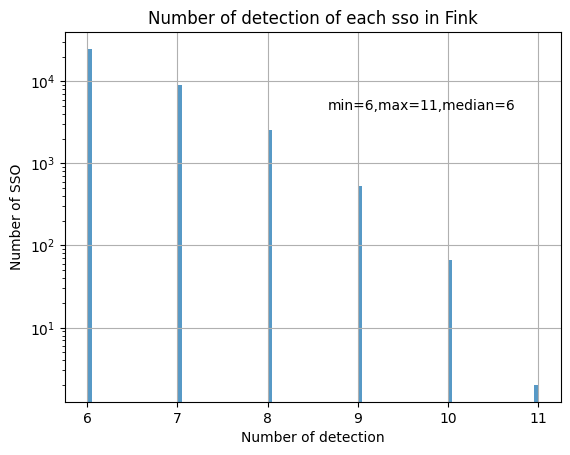

In [5]:
u.plot_nb_det_distribution(reconstructed_trajectory)

### Observation window

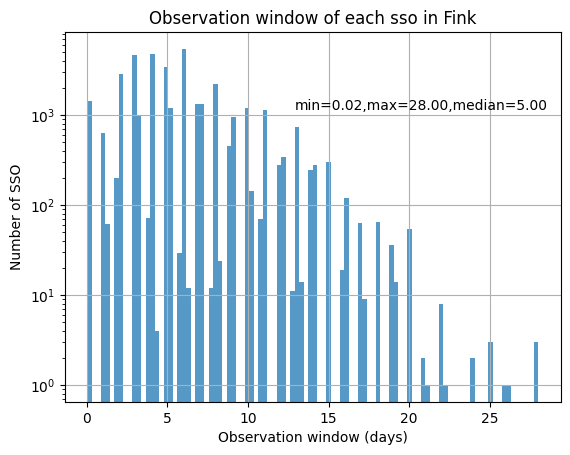

In [6]:
u.plot_tw_distribution(reconstructed_trajectory)

### Orbfit RMS distribution

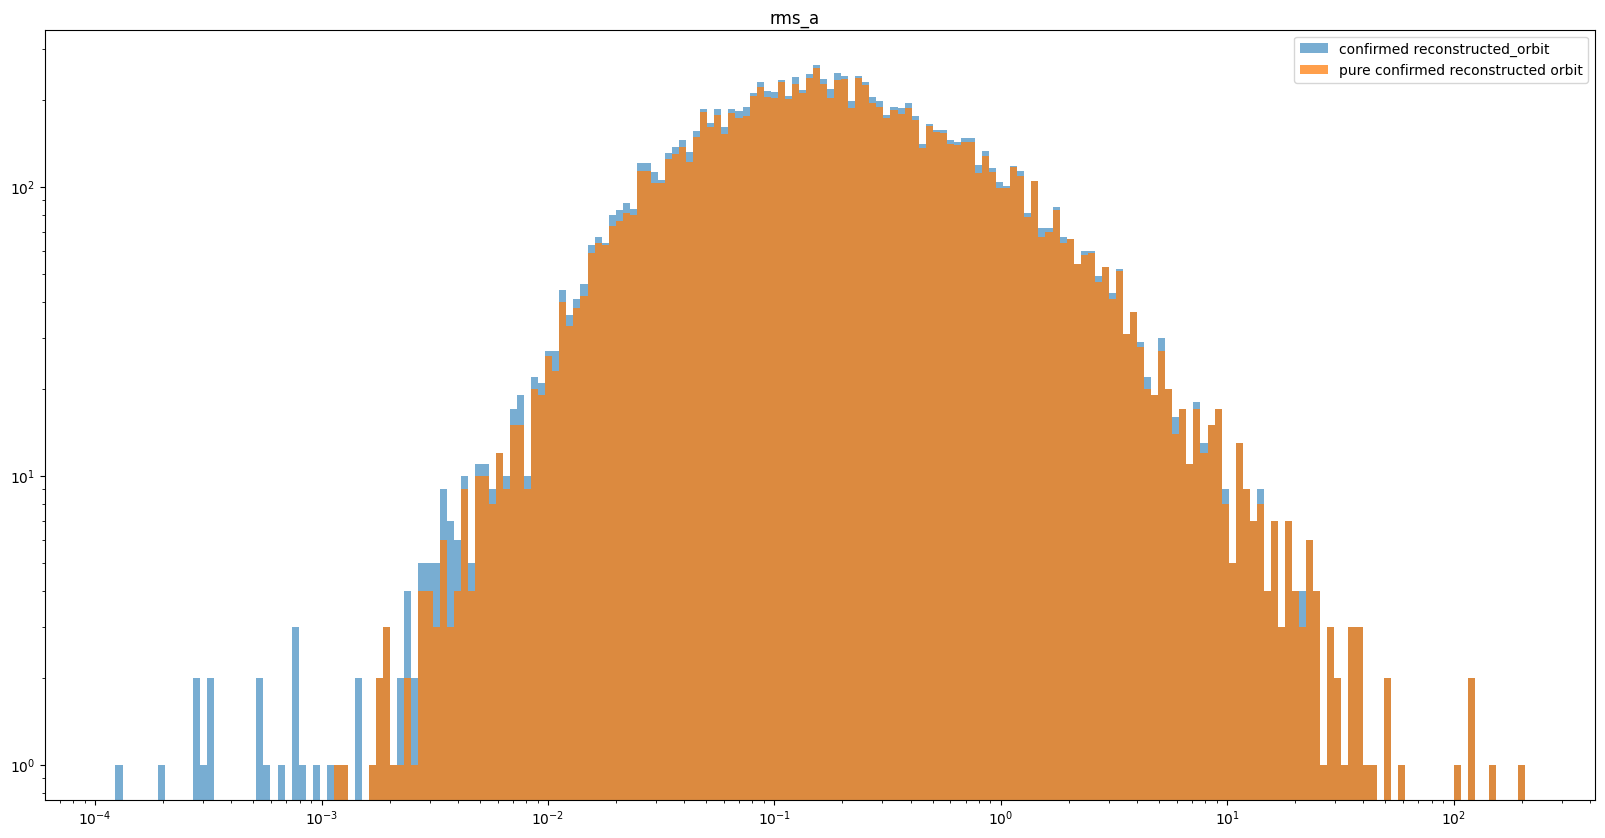

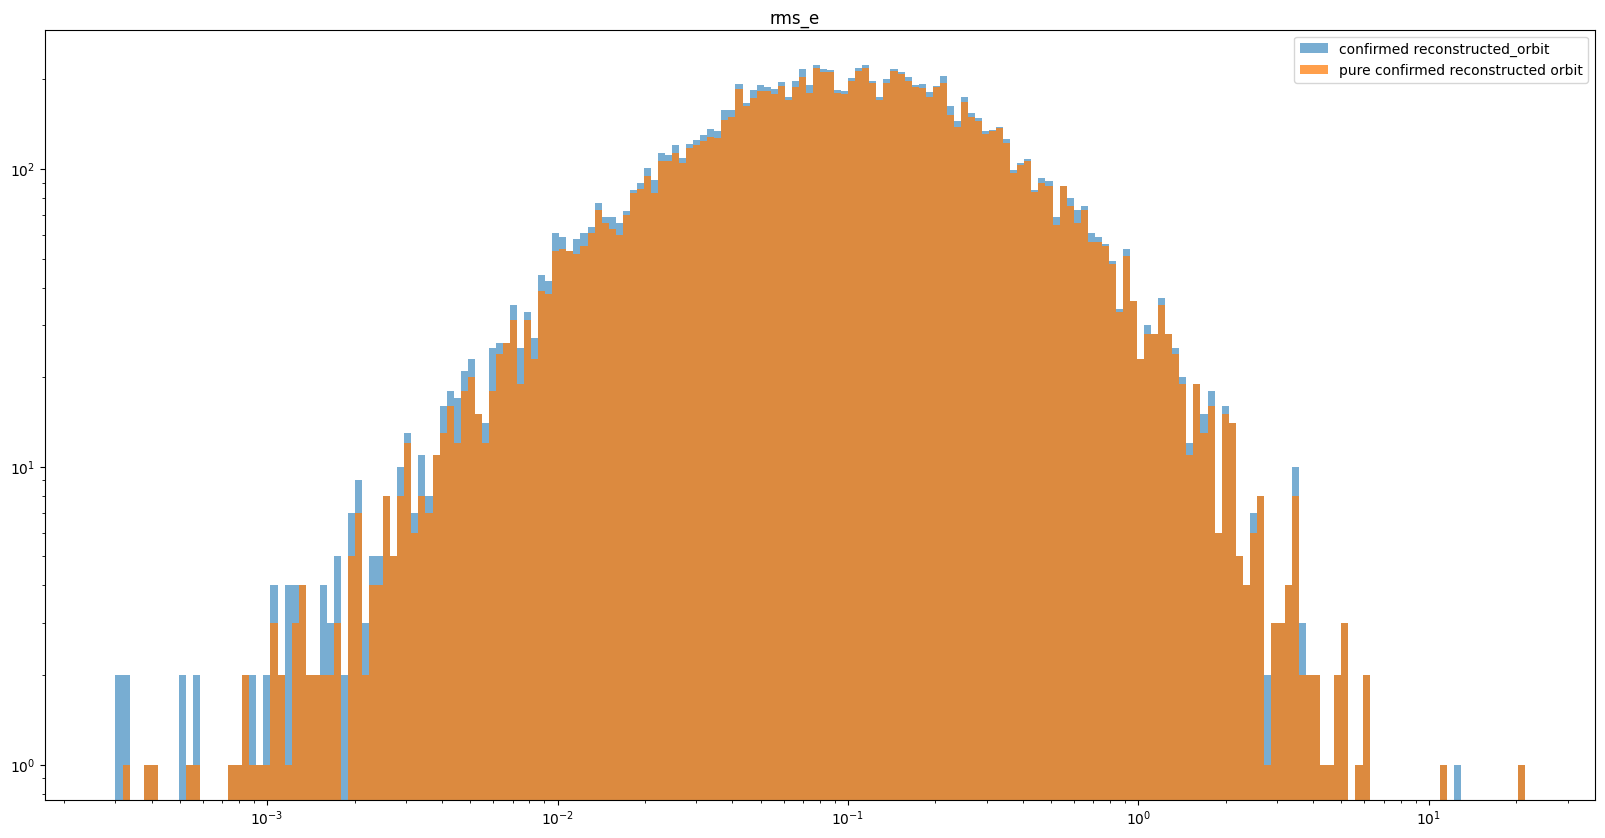

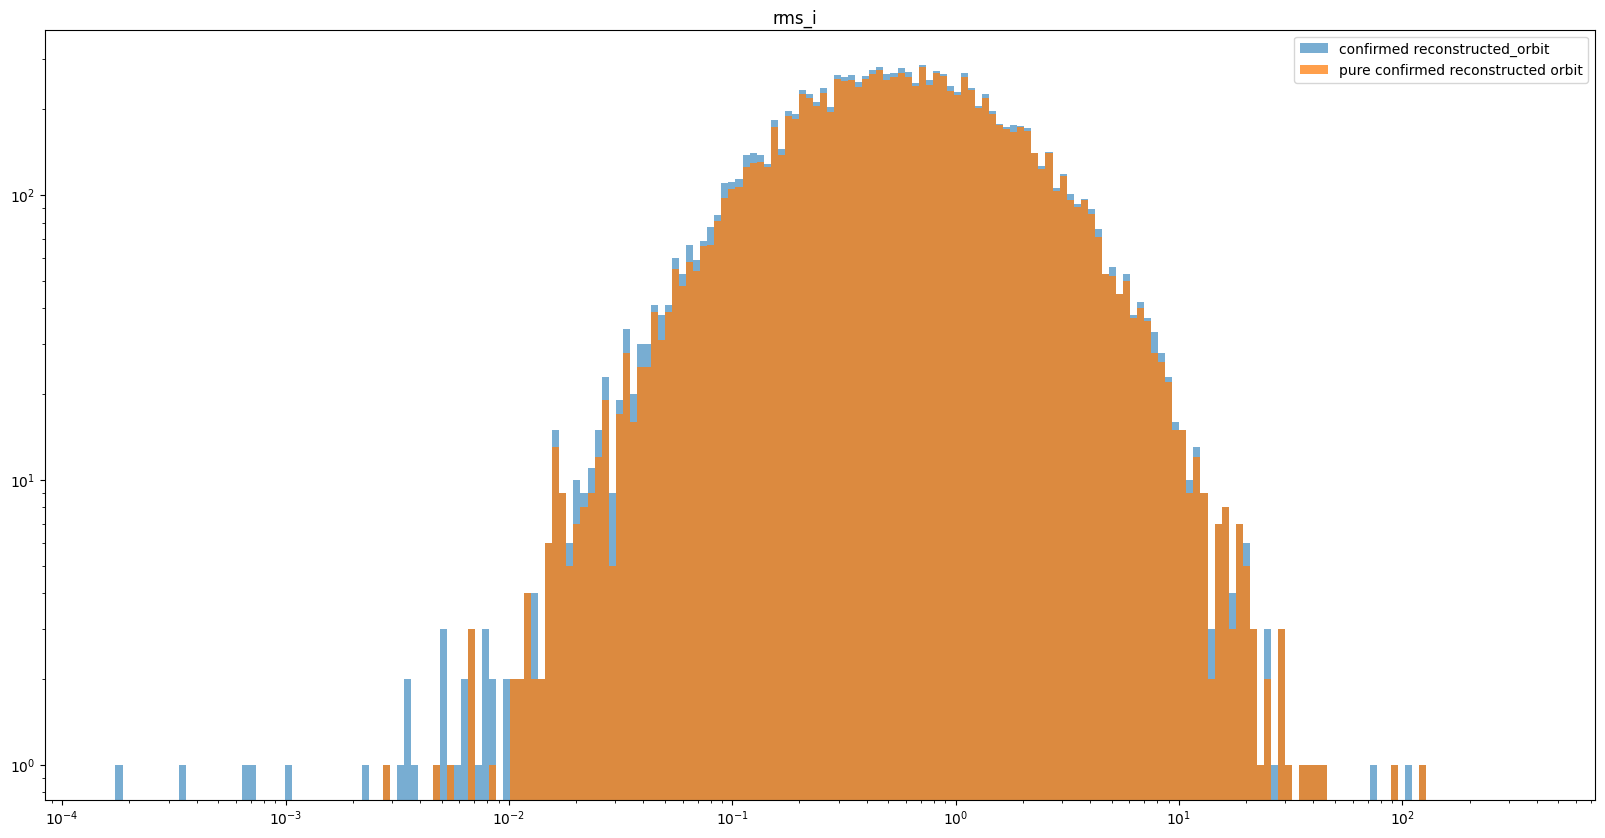

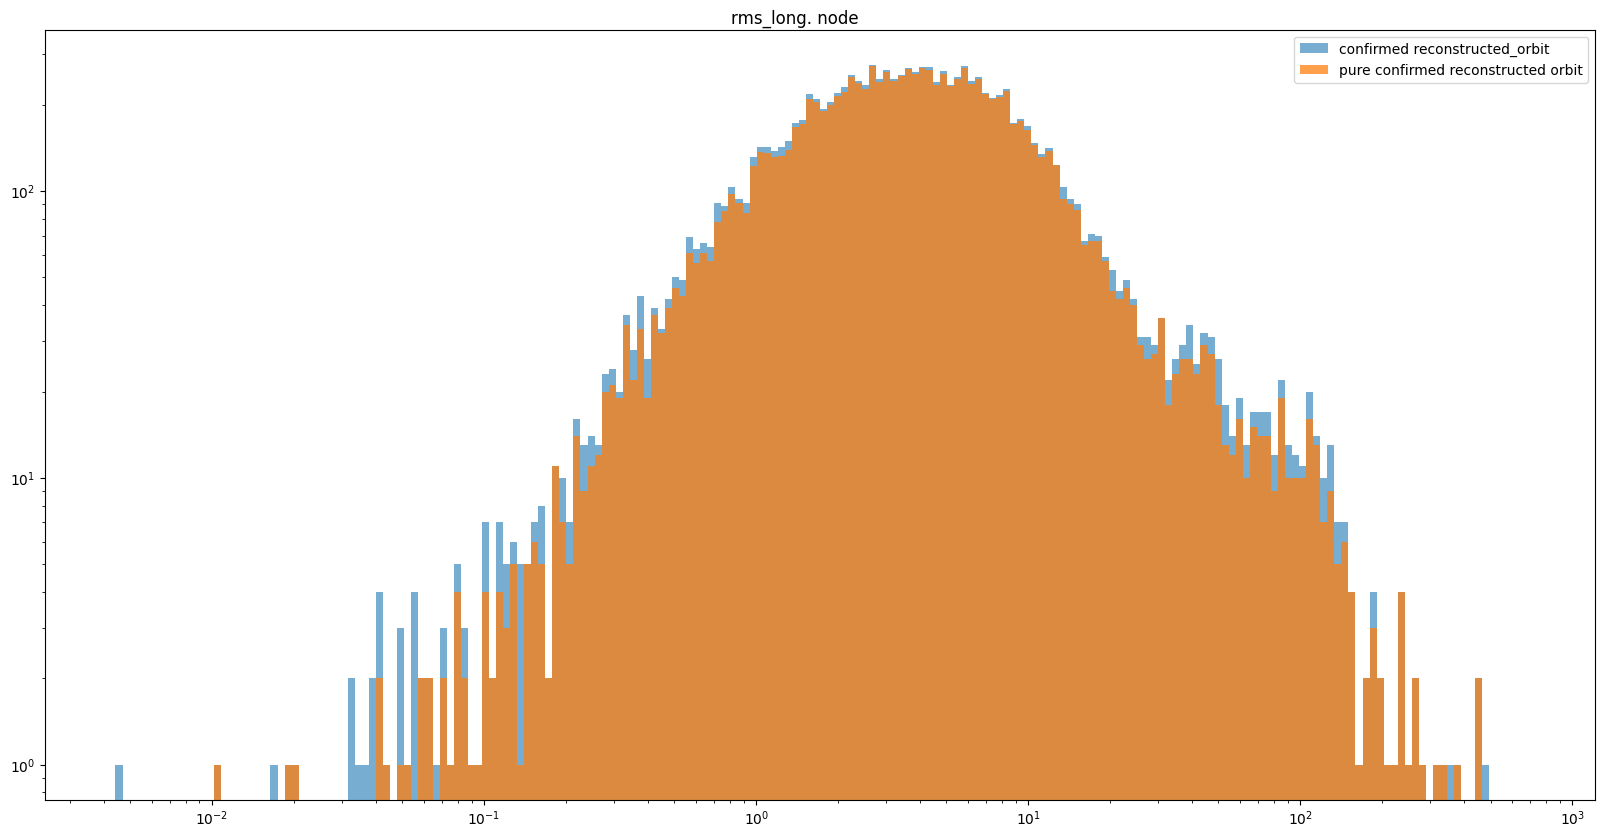

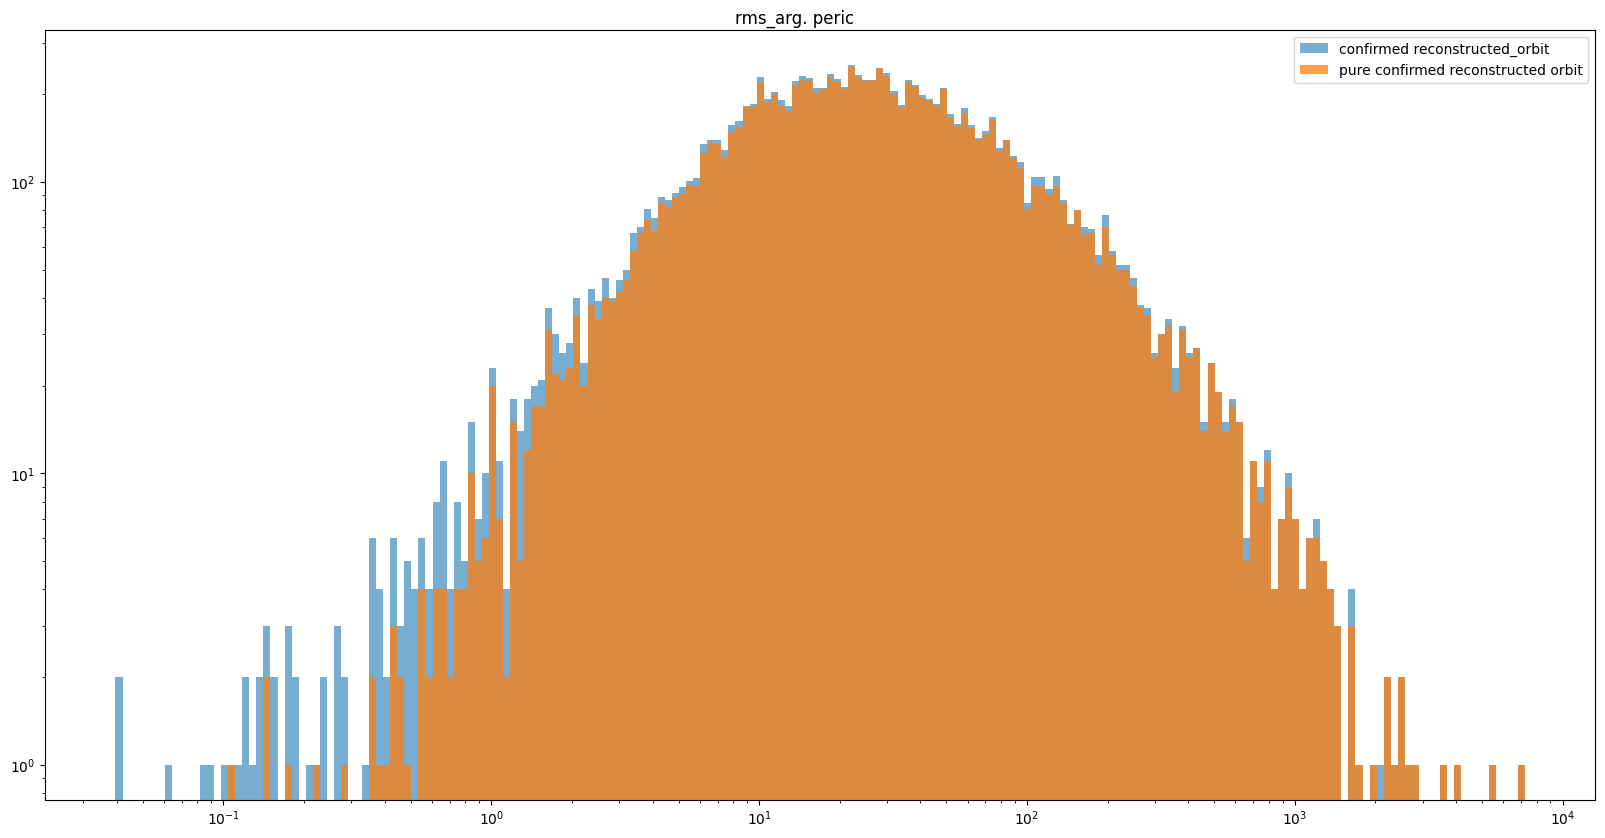

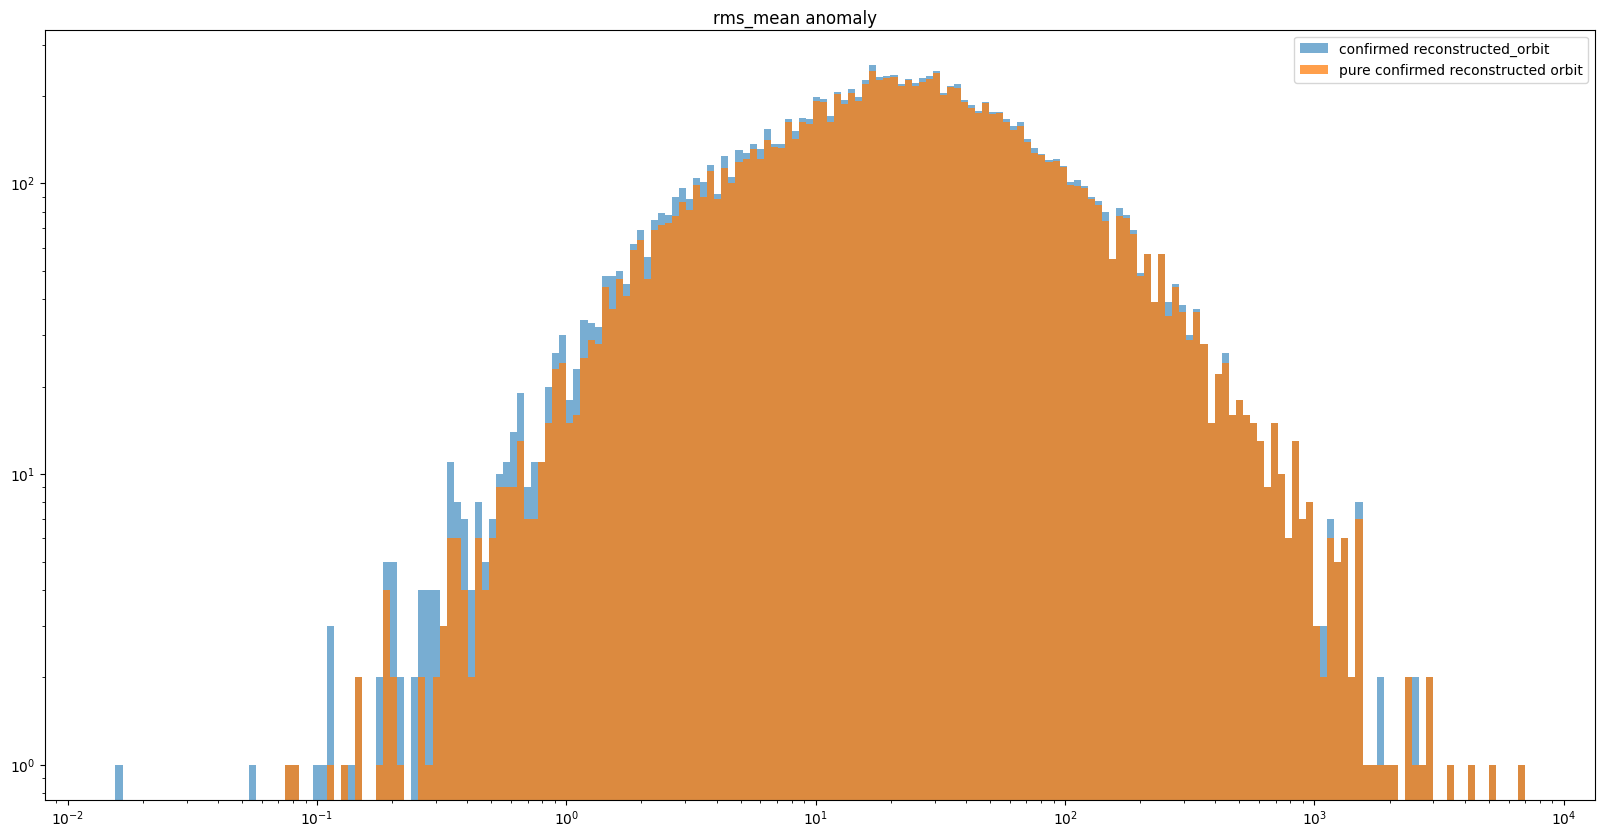

In [7]:
u.plot_rms_distribution(reconstructed_orbit, reconstructed_trajectory)

### MOPS version results

In [8]:
reconstructed_orbit_mops = pd.read_parquet("../fink_fat_experiments/confirmed_mops_fink_fat/mpc/orbital.parquet")
reconstructed_trajectory_mops = pd.read_parquet("../fink_fat_experiments/confirmed_mops_fink_fat/mpc/trajectory_orb.parquet")
input_data_mops = pd.read_parquet("../fink_fat_experiments/confirmed_mops_fink_fat/mpc/save/")

Markdown(u.results(reconstructed_orbit_mops, reconstructed_trajectory_mops, input_data_mops))


|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87586       | X               |
| Detectable          | 45843       | X               |
| Reconstructed orbit | 34549    | 8759           |
| - Pure              | 21042    | 8014           |
| - Unique            | 16153    | 7385           |
| Purity              | 60.9 %   | 91.5 %          |
| Efficiency          | 46.8 %   | 84.3 %          |
        

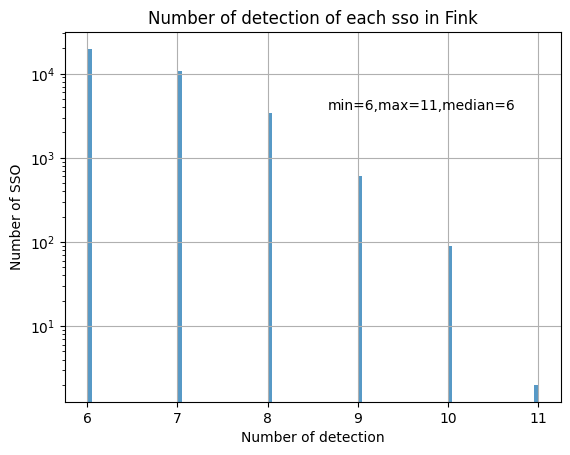

In [9]:
u.plot_nb_det_distribution(reconstructed_trajectory_mops)

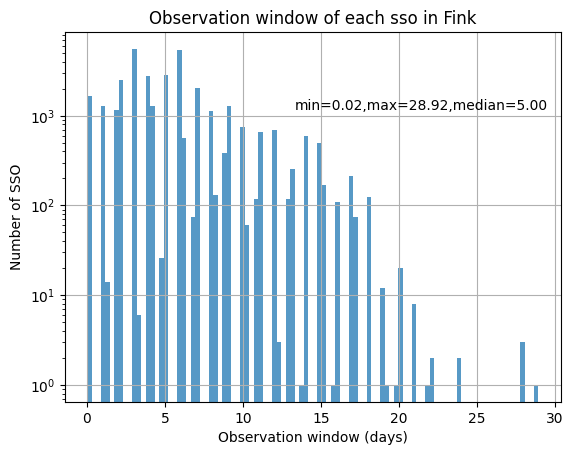

In [10]:
u.plot_tw_distribution(reconstructed_trajectory_mops)

### RMS comparison

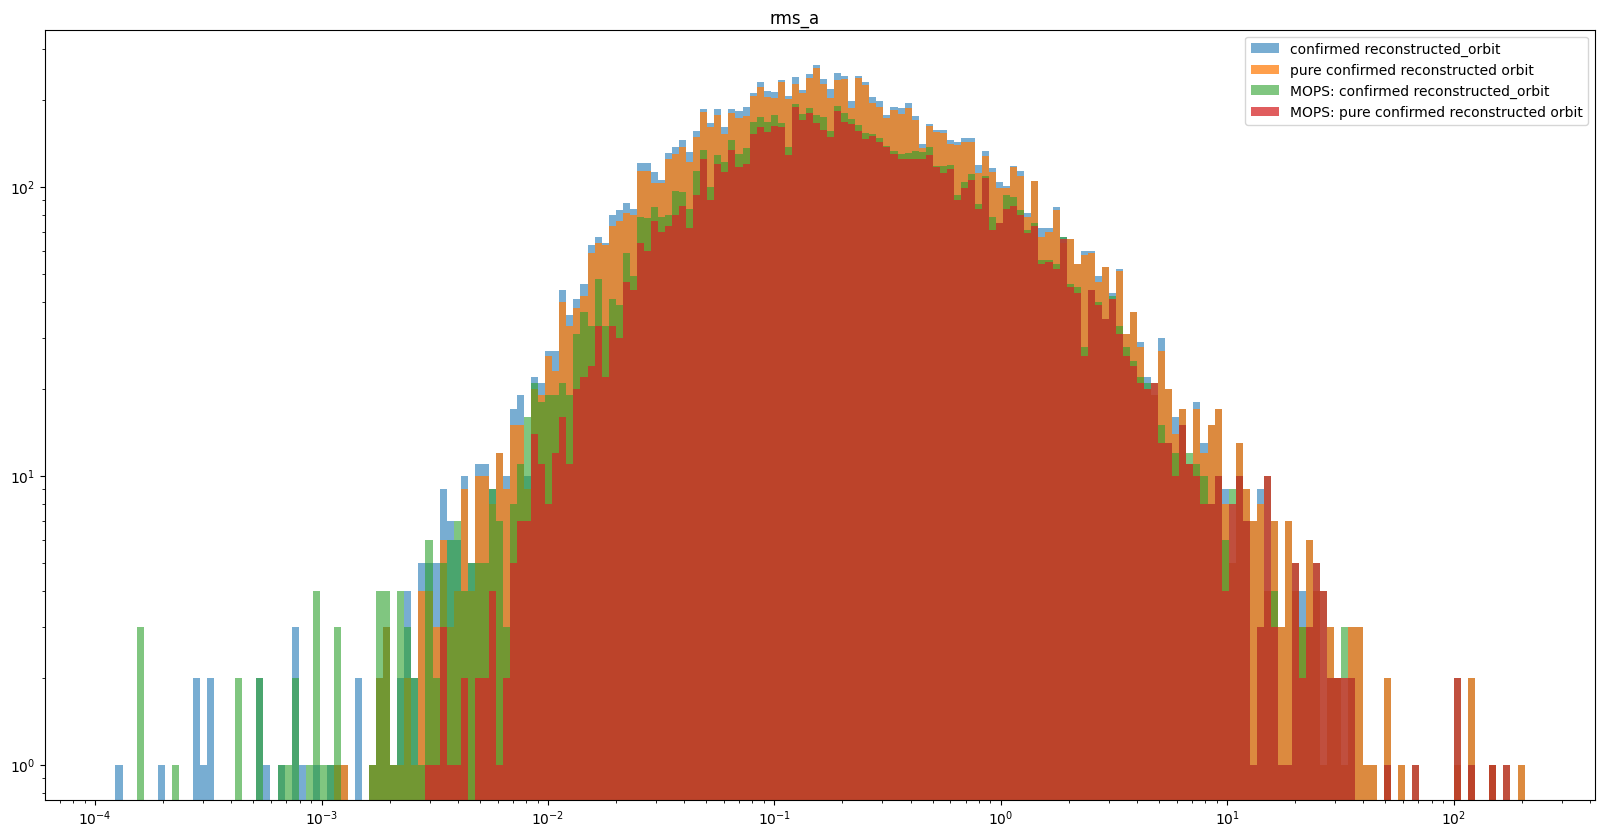

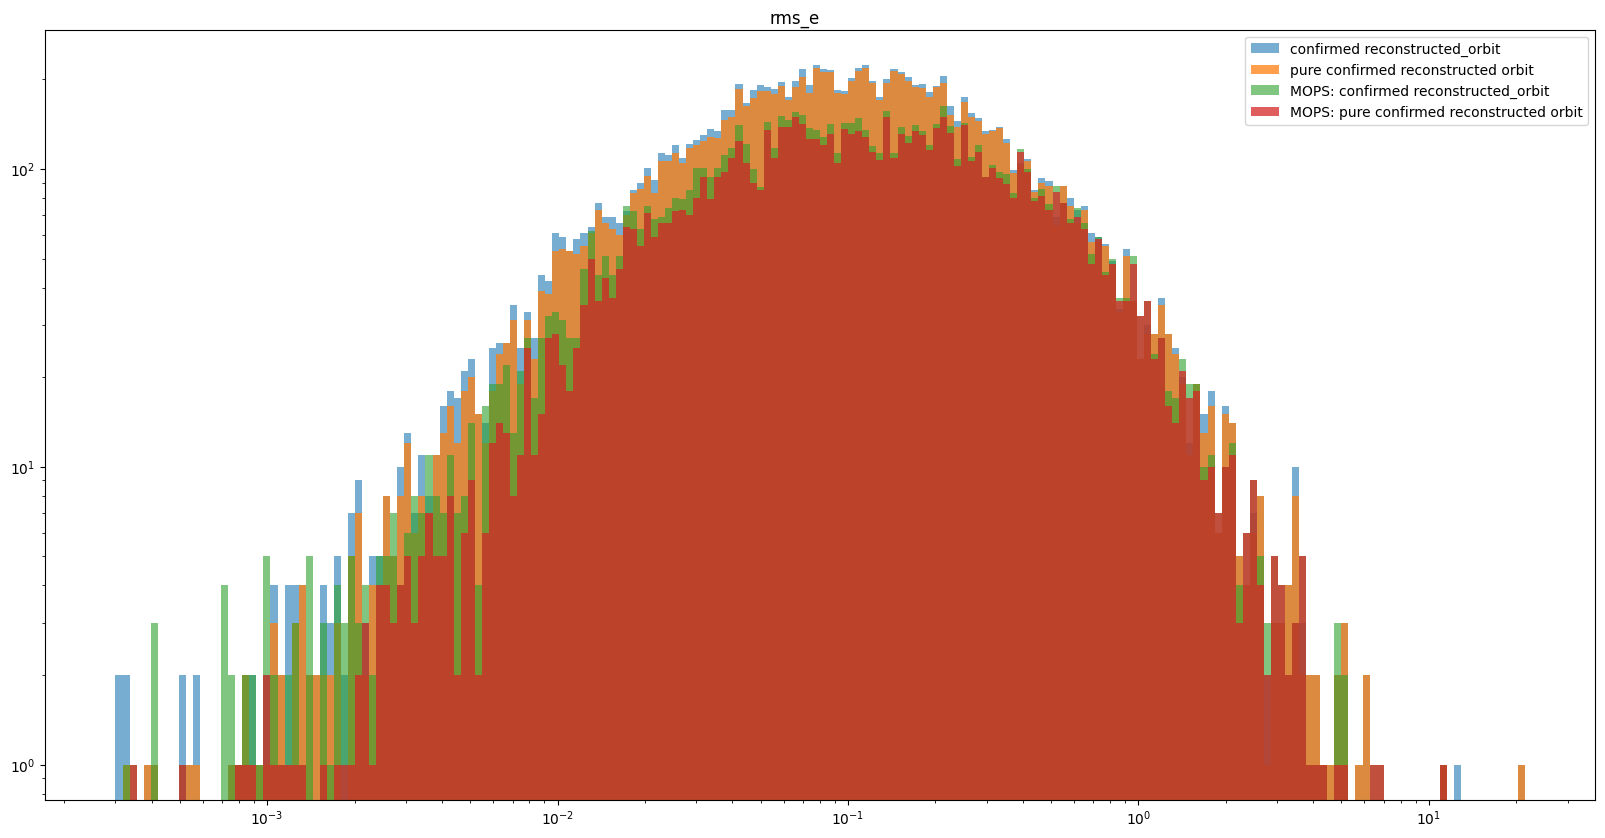

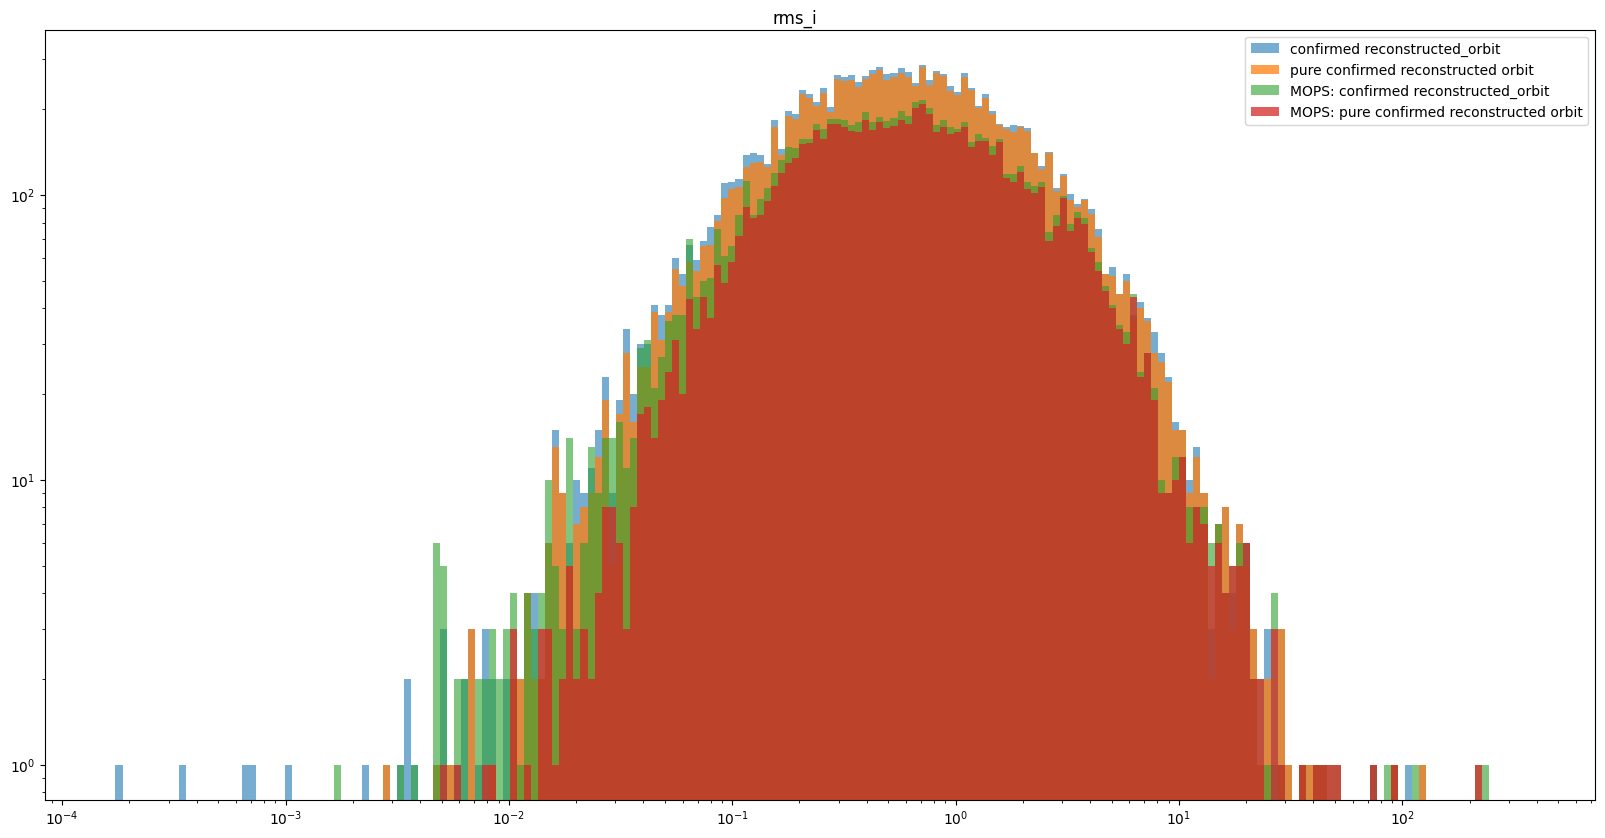

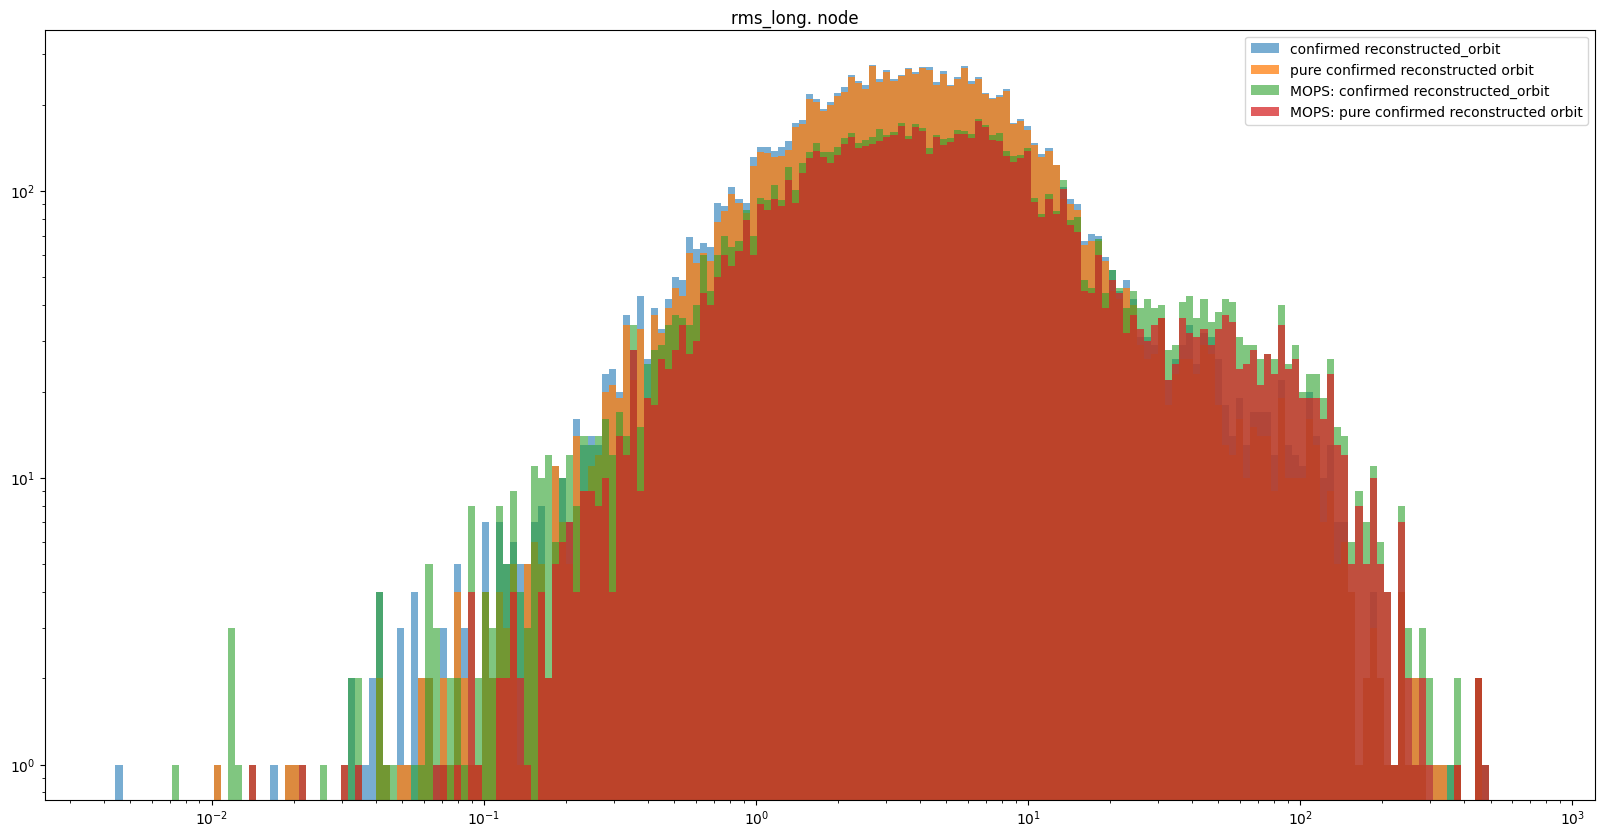

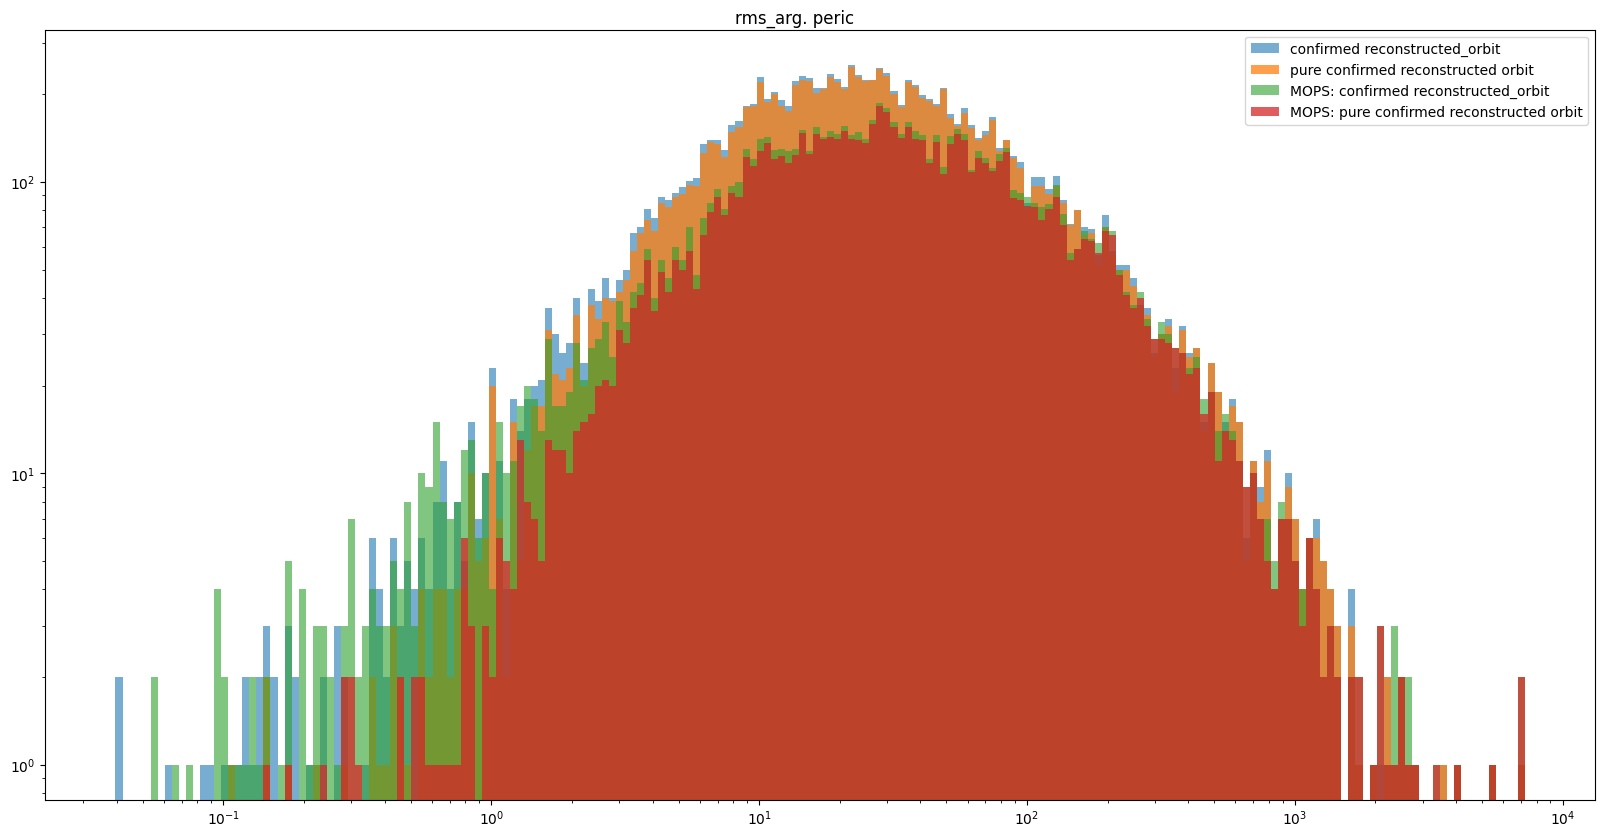

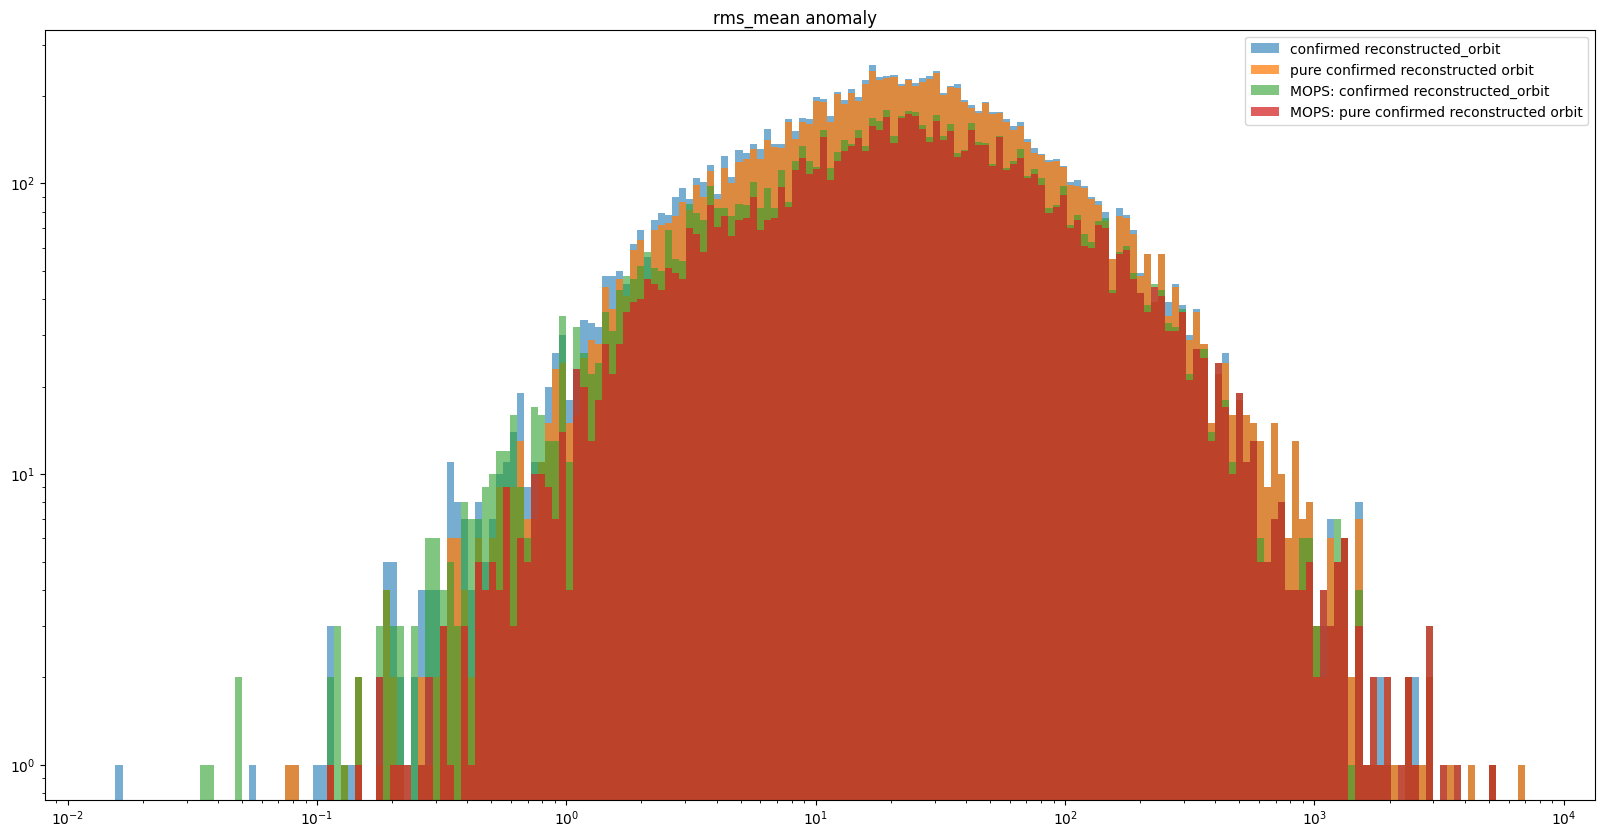

In [11]:
u.plot_rms_distribution(reconstructed_orbit, reconstructed_trajectory, reconstructed_orbit_mops, reconstructed_trajectory_mops)

### MPC Orbit Distribution

In [12]:
mpc_orb = pd.read_parquet("../data/MPC_Database/mpcorb_extended.parquet",
    columns=["Number", "Name", "Principal_desig", "Other_desigs", "a", "e", "i", "Node", "Peri", "M", "Epoch", "Orbit_type"])

In [13]:
_, _, _, _, _, unique_with_error = u.get_unique_and_pure(reconstructed_orbit, reconstructed_trajectory)

_, _, _, _, _, unique_with_error_mops = u.get_unique_and_pure(reconstructed_orbit_mops, reconstructed_trajectory_mops)

In [14]:
unique_confirmed_with_error = unique_with_error["ssnamenr"]
unique_confirmed_with_error_mops = unique_with_error_mops["ssnamenr"]

In [15]:
reconstructed_mpc, reconstruct_not_in_mpc = u.mpc_crossmatch(mpc_orb, unique_confirmed_with_error)
reconstructed_mpc_mops, reconstruct_mops_not_in_mpc = u.mpc_crossmatch(mpc_orb, unique_confirmed_with_error_mops)
input_mpc, input_not_in_mpc = u.mpc_crossmatch(mpc_orb, pd.Series(input_data["ssnamenr"].unique()))

Note : Computation of the orbit reconstruction performance take only into account of the unique pure reconstructed orbit
* Some of the object in the input data are not found in the mpc_orb database, 
    * as a consequences, 
    ```python 
        sum(initial orbit distribution) != len(input_data["ssnamenr"].unique())
    ```
    * same for the reconstructed orbit,
    ```python
        sum(Fink_FAT) != len(unique_confirmed_with_error)
    ```

In [16]:
display(Markdown(u.display_mpc_reconstruction(reconstructed_mpc, reconstructed_mpc_mops, input_mpc)))


|  | Initial orbit Distribution | Fink_FAT | MOPS |
|--|----------------------------|----------|------|
| Amor | 110 | 2 (1.82 %) | 4 (3.64 %) |
| Apollo | 87 | 1 (1.15 %) | 2 (2.30 %) |
| Aten | 13 | 0 (nan %) | 0 (nan %) |
| Distant Object | 28 | 0 (nan %) | 0 (nan %) |
| Hilda | 345 | 35 (10.14 %) | 23 (6.67 %) |
| Hungaria | 1570 | 93 (5.92 %) | 60 (3.82 %) |
| Jupiter Trojan | 2016 | 201 (9.97 %) | 120 (5.95 %) |
| MBA | 79464 | 9621 (12.11 %) | 7005 (8.82 %) |
| Object with perihelion distance < 1.665 AU | 692 | 54 (7.80 %) | 39 (5.64 %) |
| Phocaea | 1113 | 157 (14.11 %) | 107 (9.61 %) |


### Comparison with the MPC orbit parameters

In [38]:
orbit_and_ssnamenr = reconstructed_orbit.merge(unique_with_error.reset_index(), on="ssoCandId")

In [46]:
mpc_in_fink_unique_error, _ = u.mpc_crossmatch(mpc_orb, orbit_and_ssnamenr["ssnamenr"])

In [49]:
merge_mpc_and_all_orbit = u.merge_reconstruct_and_mpc(mpc_in_fink_unique_error, orbit_and_ssnamenr)

In [53]:
from bin.stat_cli import compute_residue

In [58]:
diff_data = compute_residue(merge_mpc_and_all_orbit)

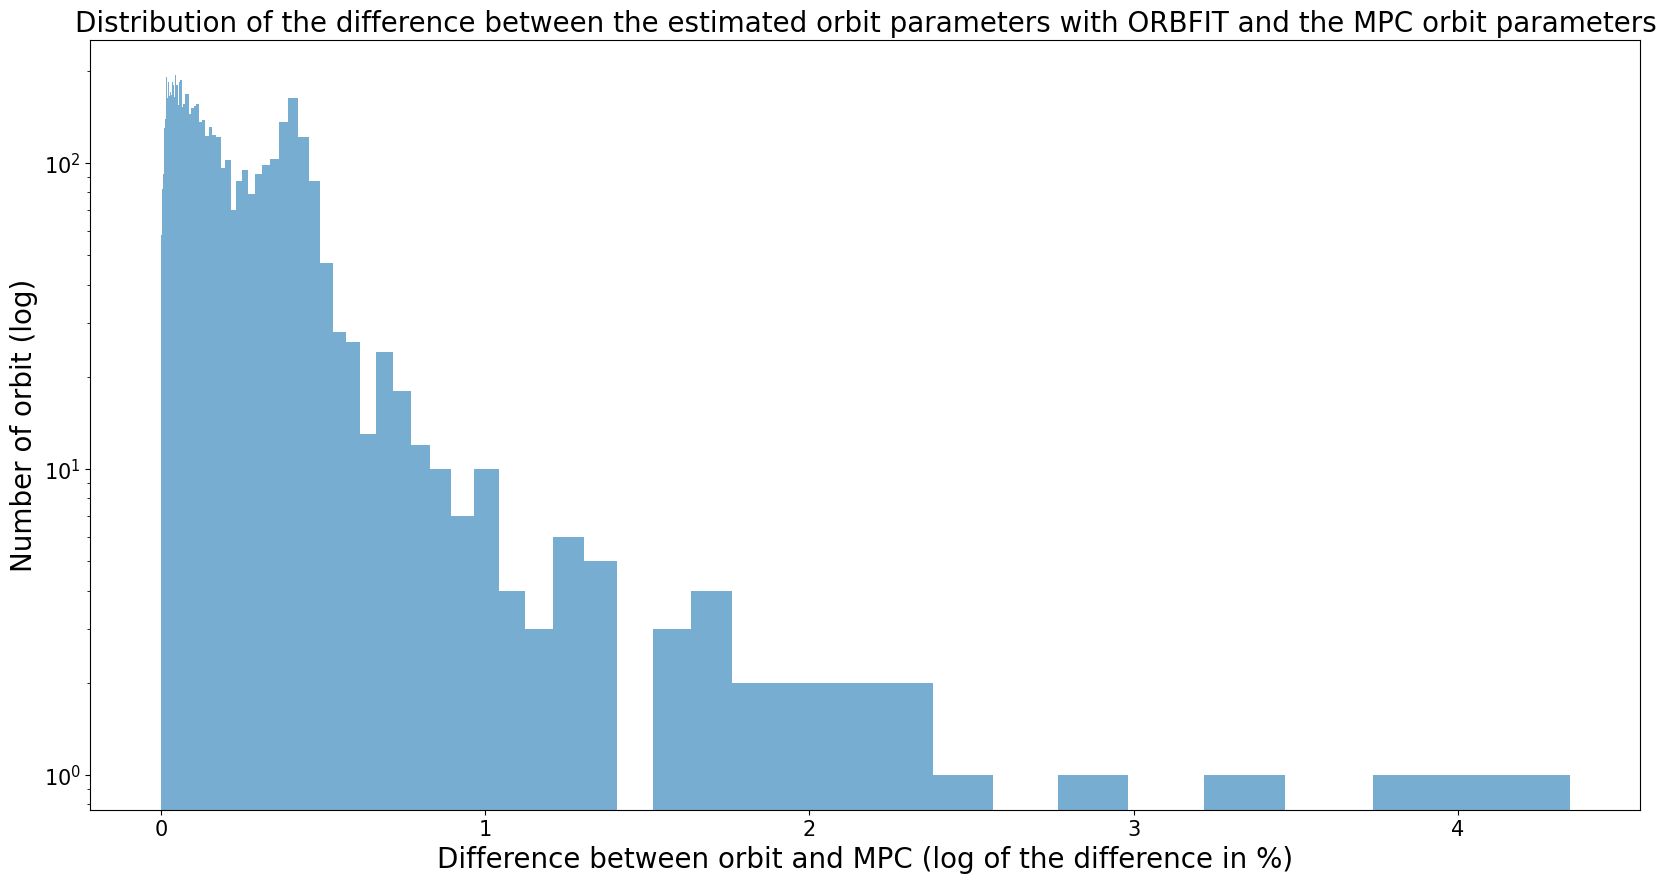

In [61]:
u.plot_orbfit_diff_hist(diff_data, "da")

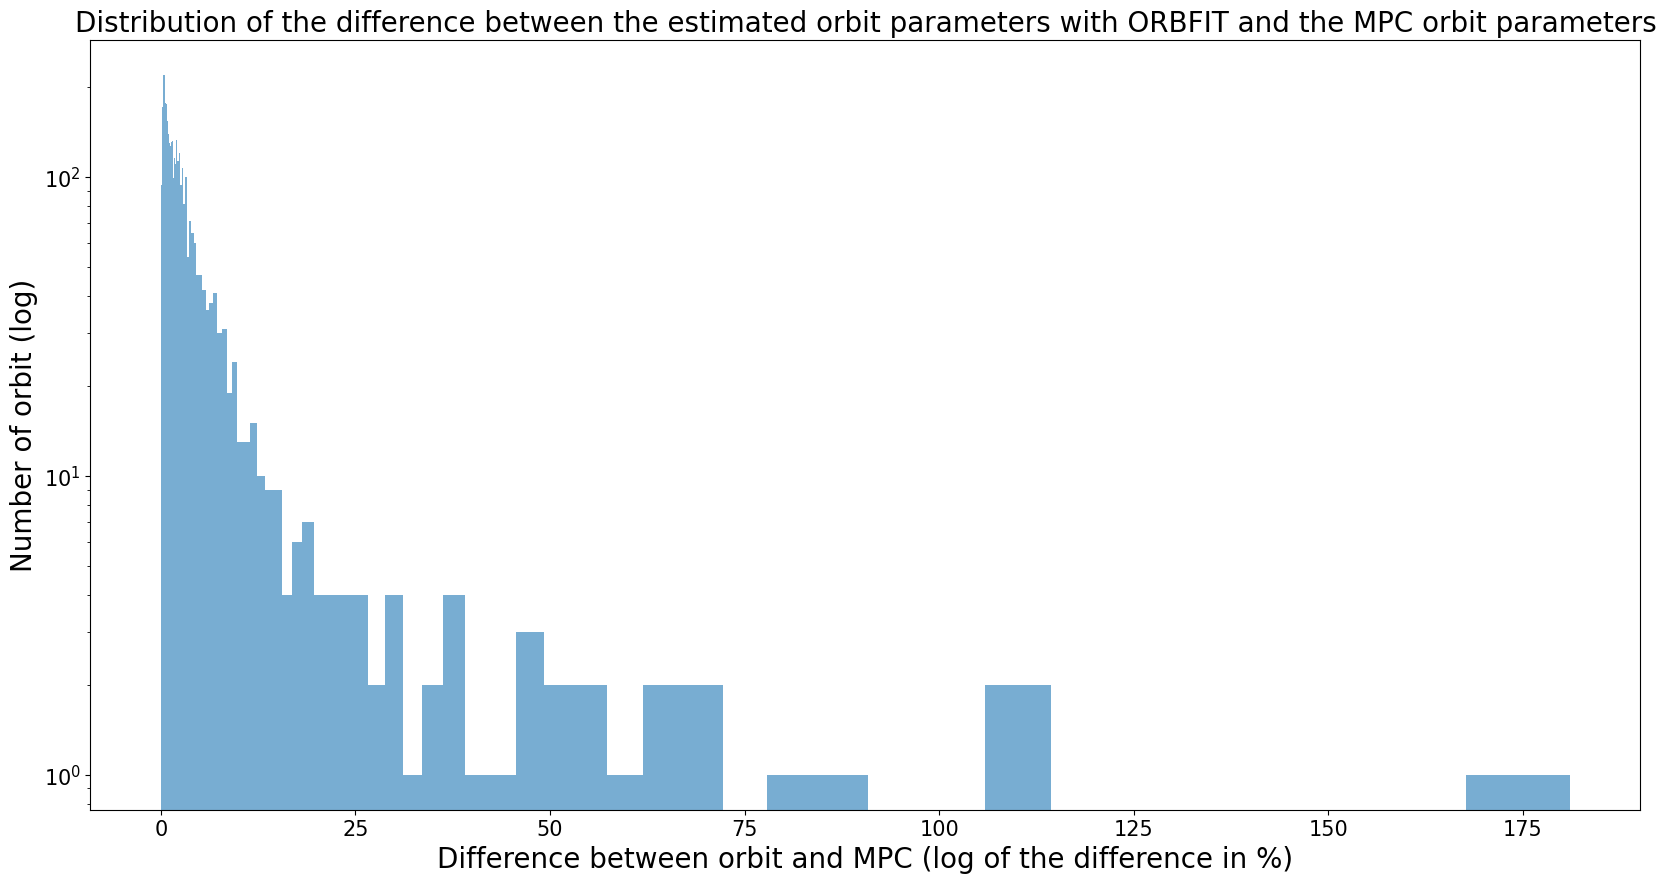

In [62]:
u.plot_orbfit_diff_hist(diff_data, "de")

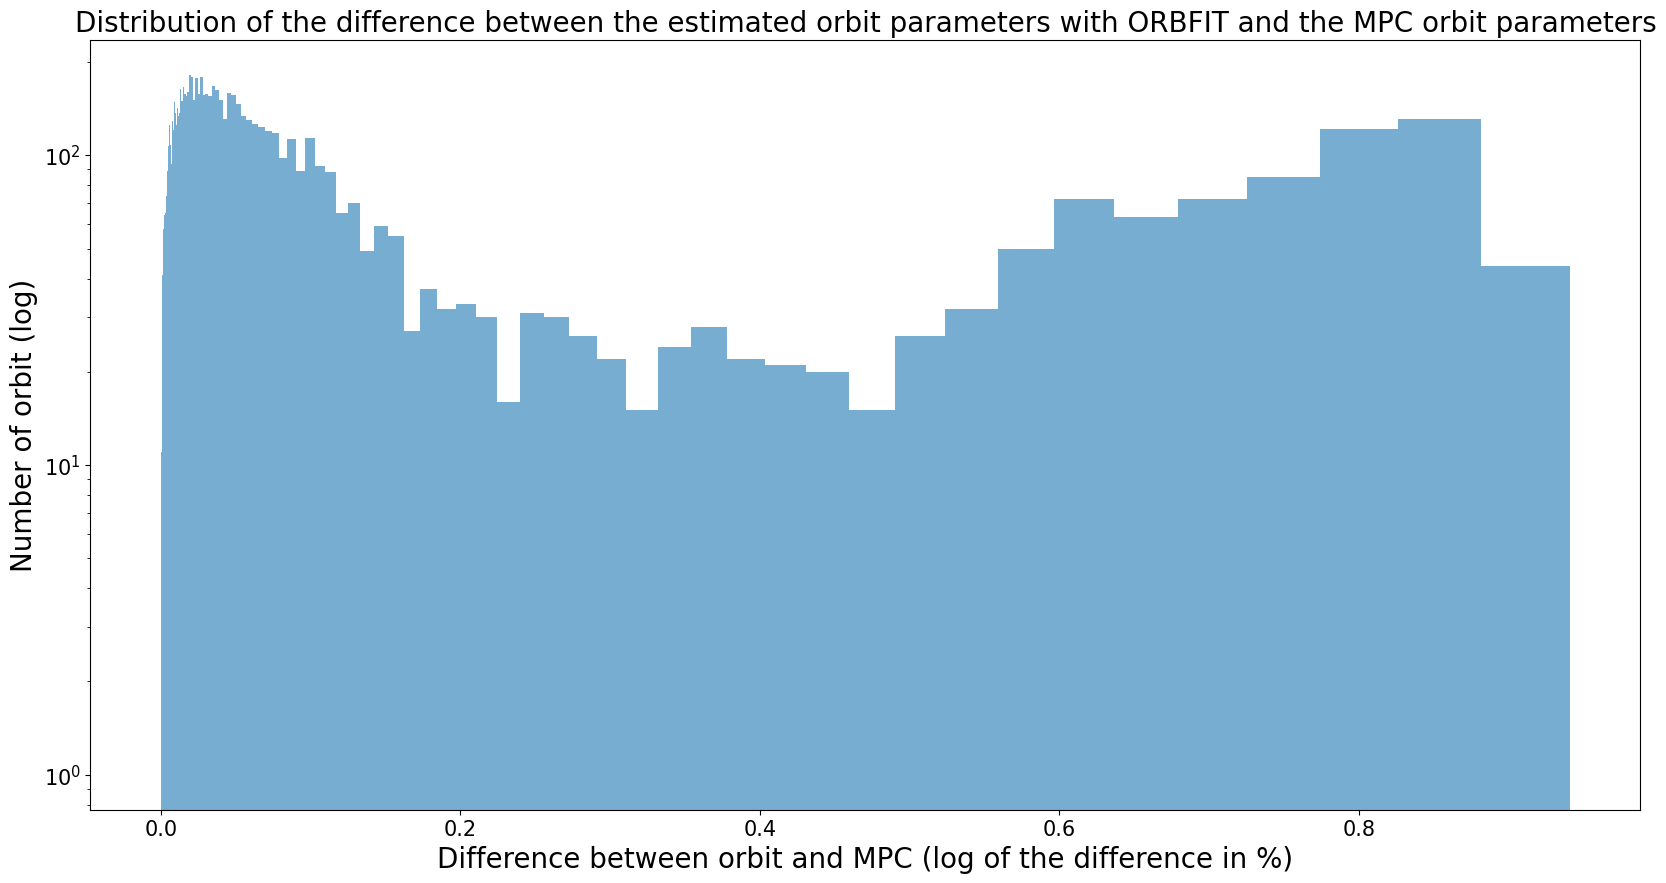

In [63]:
u.plot_orbfit_diff_hist(diff_data, "di")